<center><h1>DSCI-552 Homework 5</h1></center>
<br>
<center><font size="4">Name: Wenhao Zhang</font></center>
<center><font size="4">USC ID: 7036767117</font></center>

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

### (a) Download and read data

Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [8]:
data = pd.read_csv('../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')
data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [25]:
data['Family'].value_counts()

Leptodactylidae    4420
Hylidae            2165
Dendrobatidae       542
Bufonidae            68
Name: Family, dtype: int64

In [26]:
data['Genus'].value_counts()

Adenomera        4150
Hypsiboas        1593
Ameerega          542
Dendropsophus     310
Leptodactylus     270
Scinax            148
Osteocephalus     114
Rhinella           68
Name: Genus, dtype: int64

In [27]:
data['Species'].value_counts()

AdenomeraHylaedactylus    3478
HypsiboasCordobae         1121
AdenomeraAndre             672
Ameeregatrivittata         542
HypsiboasCinerascens       472
HylaMinuta                 310
LeptodactylusFuscus        270
ScinaxRuber                148
OsteocephalusOophagus      114
Rhinellagranulosa           68
Name: Species, dtype: int64

In [9]:
# Choose 70% of the data randomly as the training set, and rest as test set.
X_data_set = data.iloc[:, :22]
y_data_set = data.iloc[:, 22:-1]
X_train, X_test, y_train, y_test = train_test_split(X_data_set, y_data_set, test_size=0.3, random_state=0)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5036, 22)
(5036, 3)
(2159, 22)
(2159, 3)


### (b)
Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

#### i.
Research exact match and hamming score/loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem.

**ANSWER**:

* Exact match: This function calculates subset accuracy meaning the predicted set of labels should exactly match with the true set of labels.
* Hamming score/loss: This function calculates the fraction of the wrong labels to the total number of labels.

**Citation**: Lecture PDF

#### ii. 
Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation.1 You are welcome to try to solve the problem with both standardized 2 and raw attributes and report the results.

In [24]:
C_range = np.logspace(-3, 6, 10)
gamma_range = np.linspace(0.1, 2, 20)
svc_params = {"gamma":gamma_range, "C":C_range}
y_labels = ['Family', 'Genus', 'Species']
y_predict = pd.DataFrame()

for i in range(3):
    yi_train = y_train.iloc[:, i]
    yi_test = y_test.iloc[:, i]
    svc = SVC(kernel='rbf', decision_function_shape='ovr')
    clf = GridSearchCV(svc, svc_params, cv=10, n_jobs=-1)
    clf.fit(X_train, yi_train)
    best_svc = clf.best_estimator_
    yi_preidct = best_svc.predict(X_test)
    y_predict[y_labels[i]] = yi_preidct
    print('For label', y_labels[i], '-'*50)
    print('Best parameters:', clf.best_params_)

For label Family --------------------------------------------------
Best parameters: {'C': 10.0, 'gamma': 1.9}
For label Genus --------------------------------------------------
Best parameters: {'C': 100.0, 'gamma': 0.7999999999999999}
For label Species --------------------------------------------------
Best parameters: {'C': 10.0, 'gamma': 1.7}


In [43]:
def get_evaluation(y_true, y_predict):
    # Calculate exact match ratio
    exact_match = 0
    for truth, pred in zip(y_true.values, y_predict.values):
        match = (truth == pred) # Compare the truth and the prediction of all the labels
        if sum(match) == y_true.shape[1]: # If predicted labels are all correct, there is an exact match
            exact_match += 1;
    exact_match_ratio = exact_match / y_true.shape[0]
    
    # Calculate hamming loss
    misclassify_num = 0
    for truth, pred in zip(y_true.values, y_predict.values):
        misclassify = (truth != pred) # Compare the truth and the prediction of all the labels
        misclassify_num += np.sum(misclassify) # Record the sum of misclassification ones
    hamming_loss = misclassify_num / (y_true.shape[0] * y_true.shape[1])
    
    print('Exact match ratio:', exact_match_ratio)
    print('Hamming score:', 1-hamming_loss)
    print('Hamming loss:', hamming_loss)

In [44]:
print('For SVM using Gaussian kernels', '-'*50)
get_evaluation(y_test, y_predict)

For SVM using Gaussian kernels --------------------------------------------------
Exact match ratio: 0.9865678554886521
Hamming score: 0.9916628068550255
Hamming loss: 0.008337193144974525


#### iii. Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [50]:
C_range = np.logspace(-3, 6, 10)
linear_svc_params = {"C":C_range}
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)
y_predict = pd.DataFrame()

for i in range(3):
    yi_train = y_train.iloc[:, i]
    yi_test = y_test.iloc[:, i]
    linear_svc = LinearSVC(penalty='l1', multi_class='ovr', dual=False, max_iter=10000)
    linear_clf = GridSearchCV(linear_svc, linear_svc_params, cv=10, n_jobs=-1)
    linear_clf.fit(X_train_std, yi_train)
    best_linear_svc = linear_clf.best_estimator_
    yi_preidct = best_linear_svc.predict(X_test_std)
    y_predict[y_labels[i]] = yi_preidct
    print('For label', y_labels[i], '-'*50)
    print('Best parameters:', linear_clf.best_params_)

print()
print('For L1-penalized SVM with standardization', '-'*50)
get_evaluation(y_test, y_predict)

For label Family --------------------------------------------------
Best parameters: {'C': 1.0}
For label Genus --------------------------------------------------
Best parameters: {'C': 10.0}
For label Species --------------------------------------------------
Best parameters: {'C': 10.0}

For L1-penalized SVM with standardization --------------------------------------------------
Exact match ratio: 0.9119962945808244
Hamming score: 0.9461170294889609
Hamming loss: 0.05388297051103906


#### iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [58]:
# Citation: The right way of using SMOTE with Cross-validation
# https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7
# Use imblearn.pipeline and use SMOTE as a part of the pipeline to do SMOTE during Cross Validation

C_range = np.logspace(-3, 6, 10)
linear_svc_params = {"classifier__C":C_range}
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=0)],
                                ['scaler', StandardScaler()],
                                ['classifier', LinearSVC(penalty='l1', multi_class='ovr', dual=False, max_iter=10000)]])
y_predict = pd.DataFrame()
                                
for i in range(3):
    yi_train = y_train.iloc[:, i]
    yi_test = y_test.iloc[:, i]
    linear_clf = GridSearchCV(pipeline, linear_svc_params, cv=10, n_jobs=-1)
    linear_clf.fit(X_train, yi_train)
    best_linear_svc = linear_clf.best_estimator_
    yi_preidct = best_linear_svc.predict(X_test)
    y_predict[y_labels[i]] = yi_preidct
    print('For label', y_labels[i], '-'*50)
    print('Best parameters:', linear_clf.best_params_)

print()
print('For L1-penalized SVM with standardization using SMOTE', '-'*50)
get_evaluation(y_test, y_predict)

For label Family --------------------------------------------------
Best parameters: {'classifier__C': 10.0}
For label Genus --------------------------------------------------
Best parameters: {'classifier__C': 10.0}
For label Species --------------------------------------------------
Best parameters: {'classifier__C': 0.1}

For L1-penalized SVM with standardization using SMOTE --------------------------------------------------
Exact match ratio: 0.8540991199629459
Hamming score: 0.9229581596418095
Hamming loss: 0.07704184035819052


**ANSWER**: The results of different models are shown in the table below.

| Model | Exact Match Ratio | Hamming Score | Hamming Loss |
| ----- | ---------- | ------ | --------- |
| SVM using Gaussian kernels | 0.9865678554886521 | 0.9916628068550255 | 0.008337193144974525 |
| L1-penalized SVM with standardization | 0.9119962945808244 | 0.9461170294889609 | 0.05388297051103906 |
| L1-penalized SVM with standardization using SMOTE | 0.8540991199629459 | 0.9229581596418095 | 0.07704184035819052 |

We can tell that SVM using Gaussian kernels performs better than L1-penalized SVM with standardization. And after using SMOTE, the exact match ratio and Hamming score of L1-penalized SVM become lower. That is because of the **precision-recall trade-off**. To deal with class imbalance, we need to sacrifice some precision in order to get higher true positive rate.

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

**Monte-Carlo Simulation**: Perform the following procedures 50 times, and report
the average and standard deviation of the 50 Hamming Distances that you calculate.

### (a)
Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

### (b)
In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

### (c)
Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss5 between the true labels and the labels assigned by clusters.

In [78]:
# For question (a), return the best k with the highest Silhouette score 
# Use different random_state each iteration to do different centroid initialization
def get_best_k(X, max_k, random_state_index):
    best_k = 2
    max_score = 0
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=random_state_index).fit(X)
        kmeans_labels = kmeans.labels_
        silhouette = silhouette_score(X, kmeans_labels)
        if silhouette > max_score:
            best_k = k
            max_score = silhouette
    print('Best k:', best_k)
    return best_k

# For question (b), return majority labels of clusters
def get_majority_labels(y, kmeans_labels, best_k):
    major_labels = pd.DataFrame(columns=y.columns)
    for cluster in range(best_k):
        idx, = np.where(kmeans_labels == cluster)
        cluster_observations = y.iloc[idx, :]
        cluster_major_labels = []
        for label in y.columns:
            major_label = cluster_observations.loc[:, label].value_counts().index[0]
            cluster_major_labels.append(major_label)
        major_labels.loc[cluster] = cluster_major_labels
    print('Majority labels of clusters:')
    print(major_labels)
    return major_labels

# For question (c), calculate the Hamming distance, Hamming score, and Hamming loss 
def evaluation(y, kmeans_labels, major_labels):
    misclassify_num = 0
    for cluster in range(len(major_labels)):
        idx, = np.where(kmeans_labels == cluster)
        for label in y.loc[idx].values:
            misclassify = (label != major_labels.loc[cluster].values)
            misclassify_num += sum(misclassify)
    hamming_distance = misclassify_num / y.shape[0]
    hamming_loss = misclassify_num / (y.shape[0] * y.shape[1])
    print('Hamming distance:', hamming_distance)
    print('Hamming score:', 1-hamming_loss)
    print('Hamming loss:', hamming_loss)
    return hamming_distance, hamming_loss

# Monte-Carlo Simulation
def monte_carlo_simulation(X, y, times):
    hamming_distance = []
    hamming_score = []
    hamming_loss = []
    
    for i in range(times):
        print('For iteration', i+1, '-'*50)
        
        # For question (a), get the best k with the highest Silhouette score
        best_k = get_best_k(X, 50, i)
        
        # Build K-Means Clustering model
        kmeans = KMeans(n_clusters=best_k, random_state=i).fit(X)
        kmeans_labels = kmeans.labels_
        
        # For question (b), get majority labels of clusters
        major_labels = get_majority_labels(y, kmeans_labels, best_k)
        
        # For question (c), calculate the Hamming distance, Hamming score, and Hamming loss
        cur_hamming_distance, cur_hamming_loss = evaluation(y, kmeans_labels, major_labels)
        hamming_distance.append(cur_hamming_distance)
        hamming_score.append(1-cur_hamming_loss)
        hamming_loss.append(cur_hamming_loss)
        
        print()
    return hamming_distance, hamming_score, hamming_loss

In [79]:
hamming_distance, hamming_score, hamming_loss = monte_carlo_simulation(X_data_set, y_data_set, 50)

For iteration 1 --------------------------------------------------
Best k: 4
Majority labels of clusters:
            Family      Genus                 Species
0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1    Dendrobatidae   Ameerega      Ameeregatrivittata
2          Hylidae  Hypsiboas    HypsiboasCinerascens
3          Hylidae  Hypsiboas       HypsiboasCordobae
Hamming distance: 0.6653231410701876
Hamming score: 0.7782256196432707
Hamming loss: 0.22177438035672922

For iteration 2 --------------------------------------------------
Best k: 4
Majority labels of clusters:
            Family      Genus                 Species
0          Hylidae  Hypsiboas    HypsiboasCinerascens
1    Dendrobatidae   Ameerega      Ameeregatrivittata
2  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
3          Hylidae  Hypsiboas       HypsiboasCordobae
Hamming distance: 0.66726893676164
Hamming score: 0.7775770210794533
Hamming loss: 0.2224229789205467

For iteration 3 -----------------------

In [88]:
print('For Monte-Carlo Simulation', '-'*50)
print('Average of 50 Hamming distances:', round(np.mean(hamming_distance), 15))
print('Strandard deviation of 50 Hamming distances:', round(np.std(hamming_distance), 15))
print('Average of 50 Hamming scores:', round(np.mean(hamming_score), 15))
print('Strandard deviation of 50 Hamming scores:', round(np.std(hamming_score), 15))
print('Average of 50 Hamming losses:', round(np.mean(hamming_loss), 15))
print('Strandard deviation of 50 Hamming losses:', round(np.std(hamming_loss), 15))

For Monte-Carlo Simulation --------------------------------------------------
Average of 50 Hamming distances: 0.671168867268937
Strandard deviation of 50 Hamming distances: 0.031019642340808
Average of 50 Hamming scores: 0.776277044243688
Strandard deviation of 50 Hamming scores: 0.010339880780269
Average of 50 Hamming losses: 0.223722955756312
Strandard deviation of 50 Hamming losses: 0.010339880780269


## 3. ISLR 12.6.2

### (a)

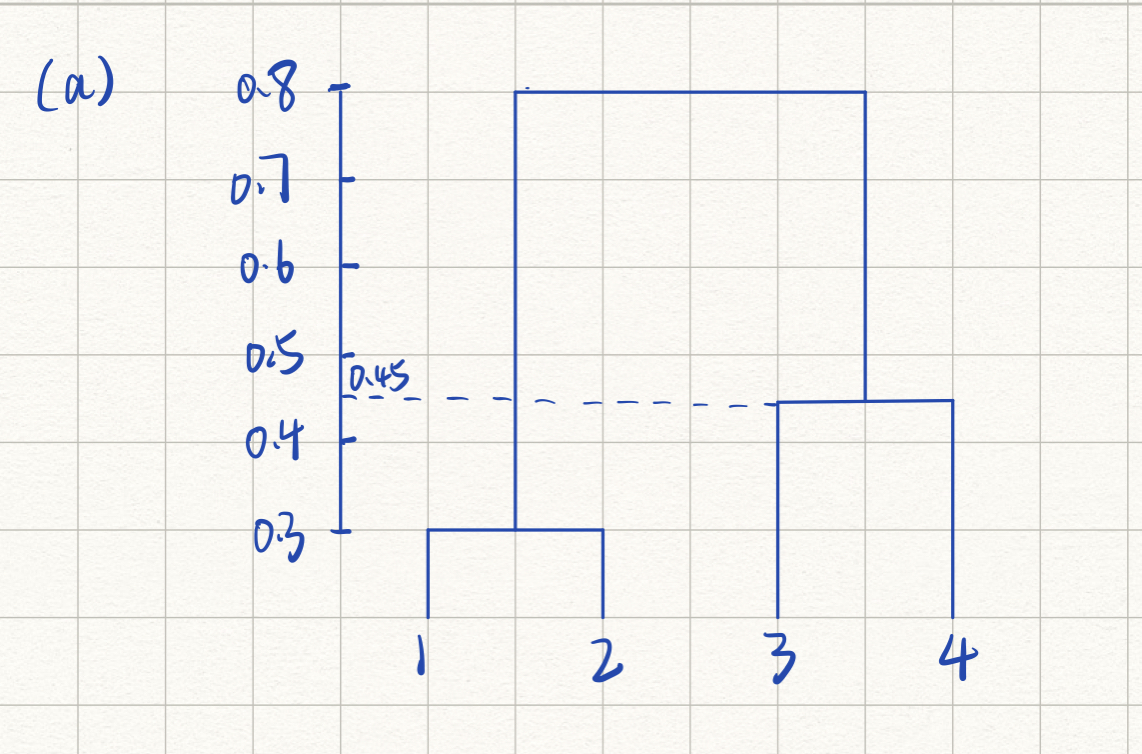

### (b)

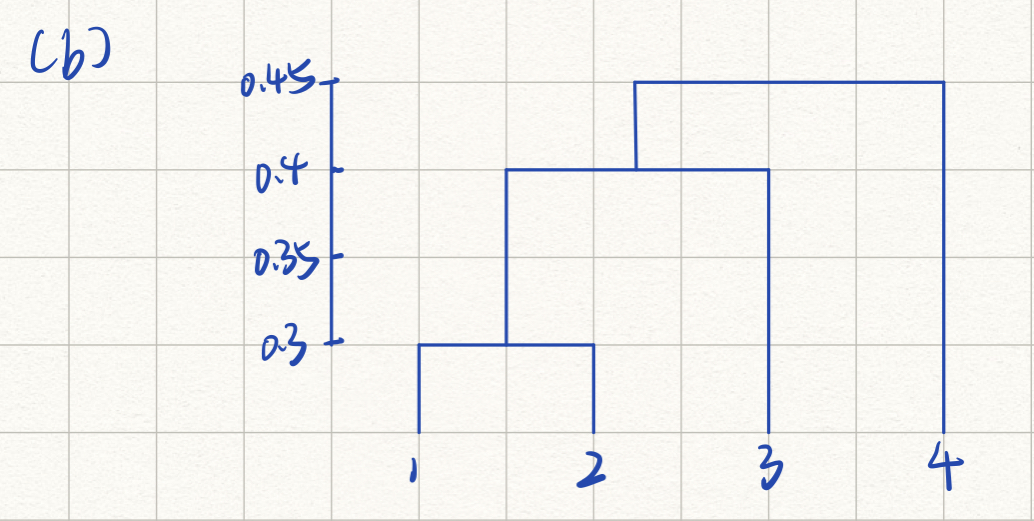

### (c)

**ANSWER**: 

* Cluster 1: (1, 2)
* Cluster 2: (3, 4)

### (d)

**ANSWER**: 

* Cluster 1: (1, 2, 3)
* Cluster 2: (4)

### (e)

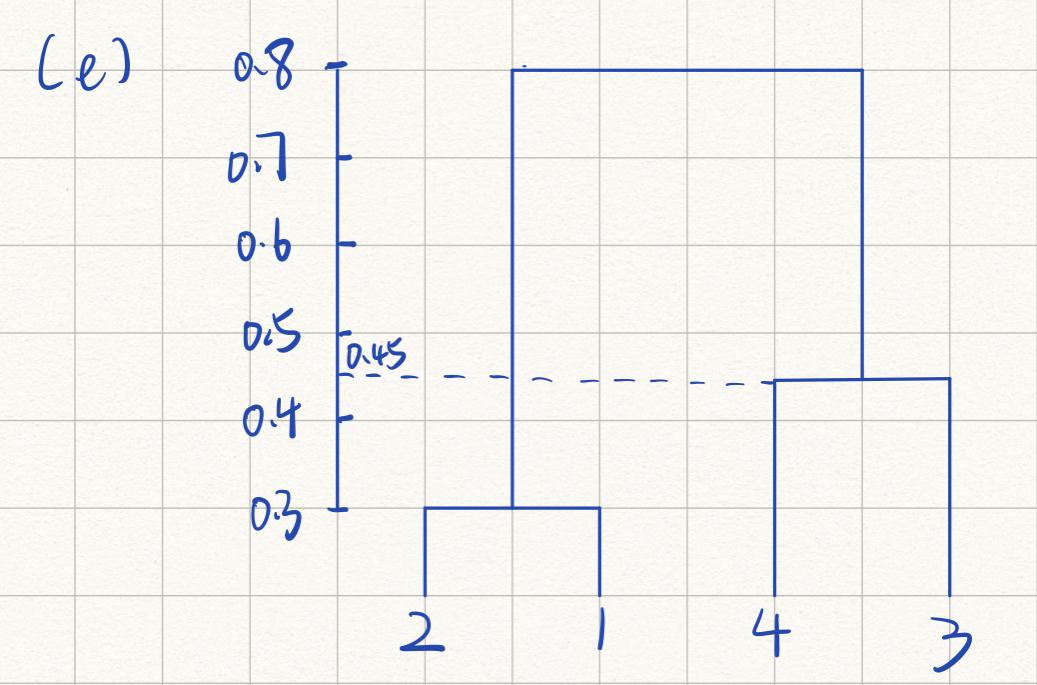

## References and Citations

#### 1. sklearn.svm.SVC
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

#### 2. sklearn.model_selection.GridSearchCV
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#### 3. Python zip()
https://www.programiz.com/python-programming/methods/built-in/zip

#### 4. sklearn.svm.LinearSVC
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

#### 5. The right way of using SMOTE with Cross-validation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

#### 6. sklearn.cluster.KMeans
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#### 7. sklearn.metrics.silhouette_score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

#### 8. What is Hamming distance?
https://www.tutorialspoint.com/what-is-hamming-distance